In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [11]:
PROCESSED_DATA_PATH = "../Data/Processed"
OUTPUT_FIGURES_PATH = "../Output/Figures"

ENROLMENT_MONTHLY_FILE = "enrollment_monthly.csv"
DEMOGRAPHIC_MONTHLY_FILE = "demographic_monthly.csv"

os.makedirs(OUTPUT_FIGURES_PATH, exist_ok=True)

In [12]:
enrolment_monthly = pd.read_csv(
    os.path.join(PROCESSED_DATA_PATH, ENROLMENT_MONTHLY_FILE)
)

demo_monthly = pd.read_csv(
    os.path.join(PROCESSED_DATA_PATH, DEMOGRAPHIC_MONTHLY_FILE)
)

print("Enrolment Monthly Shape:", enrolment_monthly.shape)
print("Demographic Monthly Shape:", demo_monthly.shape)

enrolment_monthly.head(), demo_monthly.head()

Enrolment Monthly Shape: (5062, 7)
Demographic Monthly Shape: (6004, 6)


(     month           state      district  age_0_5  age_5_17  age_18_greater  \
 0  2025-03  Andhra Pradesh  Spsr Nellore       43        44              29   
 1  2025-03           Assam         Baksa       11        14              13   
 2  2025-03           Assam       Barpeta       24        34              10   
 3  2025-03           Assam    Bongaigaon       25        33              31   
 4  2025-03           Assam       Chirang       12        29              15   
 
    total_enrolment  
 0              116  
 1               38  
 2               68  
 3               89  
 4               56  ,
      month                        state                  district  \
 0  2025-03  Andaman and Nicobar Islands                   Nicobar   
 1  2025-03  Andaman and Nicobar Islands  North And Middle Andaman   
 2  2025-03  Andaman and Nicobar Islands             South Andaman   
 3  2025-03               Andhra Pradesh                  Adilabad   
 4  2025-03               Andhra Pr

In [13]:
enrolment_monthly['month'] = pd.to_datetime(enrolment_monthly['month'])
demo_monthly['month'] = pd.to_datetime(demo_monthly['month'])

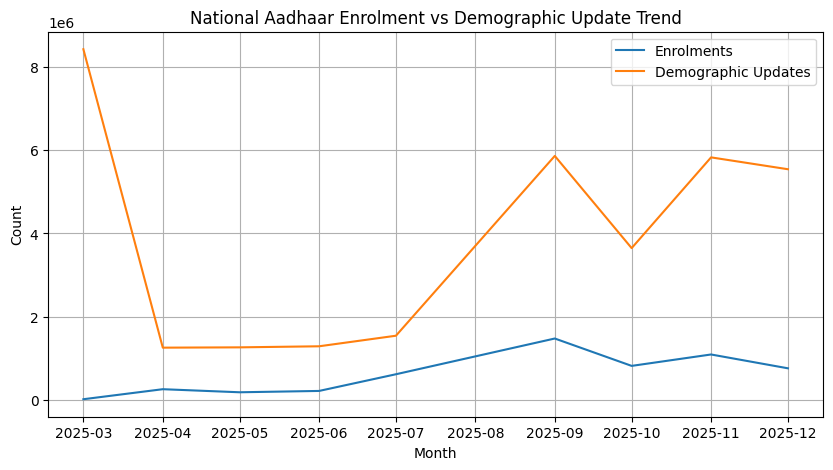

In [14]:
national_enrol_trend = enrolment_monthly.groupby('month')['total_enrolment'].sum()
national_demo_trend = demo_monthly.groupby('month')['total_demo_updates'].sum()

plt.figure(figsize=(10,5))
plt.plot(national_enrol_trend.index, national_enrol_trend.values, label="Enrolments")
plt.plot(national_demo_trend.index, national_demo_trend.values, label="Demographic Updates")

plt.title("National Aadhaar Enrolment vs Demographic Update Trend")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

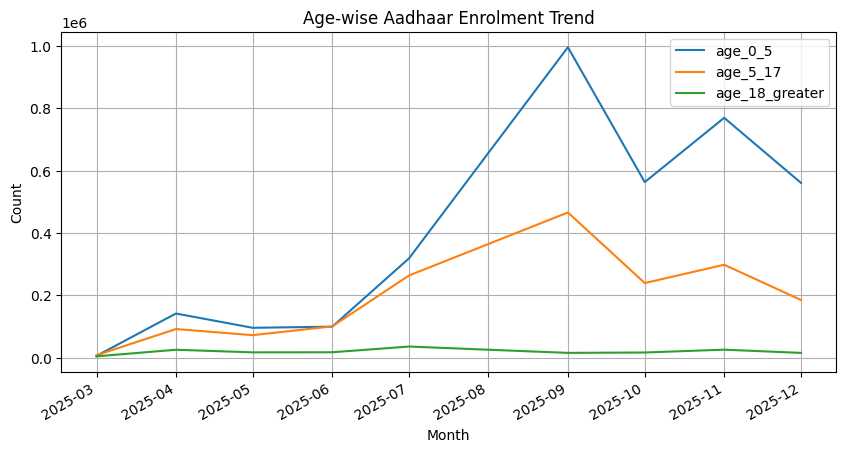

In [15]:
age_trend = enrolment_monthly.groupby('month')[
    ['age_0_5', 'age_5_17', 'age_18_greater']
].sum()

age_trend.plot(figsize=(10,5))
plt.title("Age-wise Aadhaar Enrolment Trend")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.show()

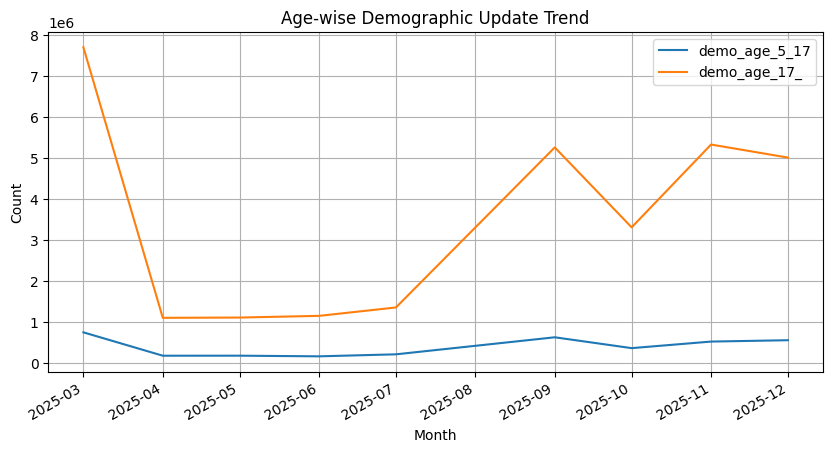

In [16]:
demo_trend = demo_monthly.groupby('month')[
    ['demo_age_5_17', 'demo_age_17_']
].sum()

demo_trend.plot(figsize=(10,5))
plt.title("Age-wise Demographic Update Trend")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [17]:
plt.figure(figsize=(10,5))
plt.plot(national_demo_trend.index, national_demo_trend.values)
plt.title("Overall Demographic Update Growth")
plt.xlabel("Month")
plt.ylabel("Updates")
plt.grid(True)

plt.savefig(os.path.join(OUTPUT_FIGURES_PATH, "demographic_update_trend.png"))
plt.close()

print("Trend figures saved successfully")

Trend figures saved successfully


In [18]:
print("KEY TREND OBSERVATIONS:")
print("1. Aadhaar enrolments show gradual stabilization over time.")
print("2. Demographic updates increase consistently month-on-month.")
print("3. Adult age group contributes the highest to both enrolments and updates.")
print("4. Indicates transition from enrolment-driven to update-driven Aadhaar usage.")

KEY TREND OBSERVATIONS:
1. Aadhaar enrolments show gradual stabilization over time.
2. Demographic updates increase consistently month-on-month.
3. Adult age group contributes the highest to both enrolments and updates.
4. Indicates transition from enrolment-driven to update-driven Aadhaar usage.
